In [ ]:
!pip install --upgrade setuptools wheel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade tokenizers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ratsnlp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ratsnlp-1.0.52-py3-none-any.whl (42 kB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Using cached Korpora-0.2.0-py3-none-any.whl (57 kB)
  Using cached transformers-4.10.0-py3-none-any.whl (2.8 MB)
  Using cached pytorch_lightning-1.6.1-py3-none-any.whl (582 kB)
  Using cached pyDeprecate-0.3.2-py3-none-any.whl (10 kB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)
  Using cached sacremoses-0.0.53-py3-none-any.whl
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached tokenizers-0.10.3.tar.gz (212 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinu

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기




> K-fold subset 1,2,3,4,5 csv를 불러오기




In [ ]:
subset1 = pd.read_csv("../dataset/KFold/Subset1.csv",encoding='UTF8',index_col=0)
subset2 = pd.read_csv("../dataset/KFold/Subset2.csv",encoding='UTF8',index_col=0)
subset3 = pd.read_csv("../dataset/KFold/Subset3.csv",encoding='UTF8',index_col=0)
subset4 = pd.read_csv("../dataset/KFold/Subset4.csv",encoding='UTF8',index_col=0)
subset5 = pd.read_csv("../dataset/KFold/Subset5.csv",encoding='UTF8',index_col=0)



> text 데이터 불러와서 text csv, subset csv primary key('Segment_ID')를 기준으로 merge를 진행한다 





In [ ]:
df =pd.read_csv("../dataset/data_assemble_new.csv",encoding='UTF8',index_col=0)

In [ ]:
dfs = [subset1,subset2,subset3,subset4,subset5]
result = pd.concat(dfs, axis=0, ignore_index=True)
result = result.rename(columns={'Speaker': 'Segment_ID'})

In [ ]:
subset1 = subset1.rename(columns={'Speaker': 'Segment_ID'})
subset2 = subset2.rename(columns={'Speaker': 'Segment_ID'})
subset3 = subset3.rename(columns={'Speaker': 'Segment_ID'})
subset4 = subset4.rename(columns={'Speaker': 'Segment_ID'})
subset5 = subset5.rename(columns={'Speaker': 'Segment_ID'})


In [ ]:
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-7-a21af6b074bd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
df = df[df['Position'] == 'Speaker']
df = df[df['compare']==1]
df = df[df['wav_compare']==1]
df = df.reset_index()


In [ ]:
subset1= pd.merge(subset1, df, on='Segment_ID', how='inner')
subset2= pd.merge(subset2, df, on='Segment_ID', how='inner')
subset3= pd.merge(subset3, df, on='Segment_ID', how='inner')
subset4= pd.merge(subset4, df, on='Segment_ID', how='inner')
subset5= pd.merge(subset5, df, on='Segment_ID', how='inner')
result= pd.merge(result, df, on='Segment_ID', how='inner')


#데이터 전처리





> subset1일 경우 subset2,3,4,5를 합친 train dataset을 만든다
>
> subset 1,2,3,4,5 설정 하기 






In [ ]:
mask = result['Segment_ID'].isin(subset2['Segment_ID'])#subset1, subset2, subset3, subset4, subset5
trainset1 = result[~mask]

In [ ]:
trainset1

,Wav_start_x,Wav_end_x,Segment_ID,Emotion_x,Valence_x,Arousal_x,IBI_mean_x,IBI_count_x,IBI_std_x,IBI_max,...,Emotion_p_i_y,Fleiss_Kappa_y,Session_y,Wav_length_y,Year_y,Position_y,compare,text,path,wav_compare
0,15.47600,19.786,Sess01_script01_F001,fear,1.5,3.6,0.940800,5.0,0.022163,0.960000,...,0.488889,0.194631,Session01_F_res,4.31000,19,Speaker,1,몰라 아 몰라 어떡해,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
1,28.94300,32.167,Sess01_script01_F002,fear,1.6,3.7,0.916000,3.0,0.024331,0.944000,...,0.644444,0.198791,Session01_F_res,3.22400,19,Speaker,1,지섭씨 일단 에 신고하자,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
2,39.26400,46.833,Sess01_script01_F003,fear,1.4,4.1,0.828889,9.0,0.026816,0.868000,...,0.355556,0.198791,Session01_F_res,7.56900,19,Speaker,1,아 지금 생각할게 할게 뭐가 있어 지섭씨는 여기있어 일단 내가 가서 보고 올테니까,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
3,73.01600,83.209,Sess01_script01_F005,fear,1.5,3.5,0.804923,13.0,0.054262,0.872000,...,0.533333,0.070443,Session01_F_res,10.19300,19,Speaker,1,아 아니 그게 말야 아무것도 도로에 아무것도 없어,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
4,97.48300,105.530,Sess01_script01_F006,fear,1.4,4.0,0.813778,9.0,0.024748,0.848000,...,0.488889,0.218391,Session01_F_res,8.04700,19,Speaker,1,아 그래 근데 지금 없어 죽었는지 살았는지 우리가 친 사람이 없단 말야,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15293,289.44998,294.943,Sess40_script06_User079F_043,neutral,3.0,3.5,0.801339,7.0,0.032167,0.843750,...,1.000000,0.259259,Sess40_eval,5.49302,20,Speaker,1,뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
15294,294.94300,297.598,Sess40_script06_User079F_044,neutral,2.9,3.1,0.760417,3.0,0.018042,0.781250,...,1.000000,-0.045752,Sess40_eval,2.65500,20,Speaker,1,그 게임 속 그 스토리 상에서는,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
15295,297.59800,304.171,Sess40_script06_User079F_045,neutral,2.6,3.6,0.789931,9.0,0.036736,0.828125,...,0.800000,0.139785,Sess40_eval,6.57300,20,Speaker,1,근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼 그니까 내가 아내가...,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1
15296,304.17100,306.863,Sess40_script06_User079F_046,neutral,2.7,3.3,0.755208,3.0,0.009021,0.765625,...,0.622222,-0.003584,Sess40_eval,2.69200,20,Speaker,1,왜냐면 내 아내를 대신할 사람이 있는 거야,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,1


In [ ]:
train_set1=trainset1[['text','Emotion_x']]
x_data1=subset2[['text','Emotion_x']]

In [ ]:
print(len(train_set1))
print(len(x_data1))

12238
3060


In [ ]:
train_set1 = train_set1.reset_index(drop=True) 
x_data1 = x_data1.reset_index(drop=True)


In [ ]:
train_set1

,text,Emotion_x
0,몰라 아 몰라 어떡해,fear
1,지섭씨 일단 에 신고하자,fear
2,아 지금 생각할게 할게 뭐가 있어 지섭씨는 여기있어 일단 내가 가서 보고 올테니까,fear
3,아 아니 그게 말야 아무것도 도로에 아무것도 없어,fear
4,아 그래 근데 지금 없어 죽었는지 살았는지 우리가 친 사람이 없단 말야,fear
...,...,...
12233,뭔가 막 그게 그니까 완전 대중화가 된 시대가 된 거야,neutral
12234,그 게임 속 그 스토리 상에서는,neutral
12235,근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내처럼 그니까 내가 아내가...,neutral
12236,왜냐면 내 아내를 대신할 사람이 있는 거야,neutral


In [ ]:
x_data1

,text,Emotion_x
0,원하냐고지섭씨 사람 목숨이 달린 거 잖아 어 일단 찾아보자 어 혹시 모르니깐 경찰...,fear
1,지금 계속 무슨 말을 하는 거야,fear
2,지섭씨 무서워,fear
3,응 알았어,fear
4,자 자 자,fear
...,...,...
3055,그건 예의가 아니지,neutral
3056,어 근데 이제 메신저를 통해서 지속적으로 연락을 하지 않으면 막 자기가 답답해하거나...,neutral
3057,사귀는 사이에서,neutral
3058,근데 약간 그 정도 면은 있어야 될 거 같애,neutral




> 카테고리 분포 bar 그래프로 나타내기




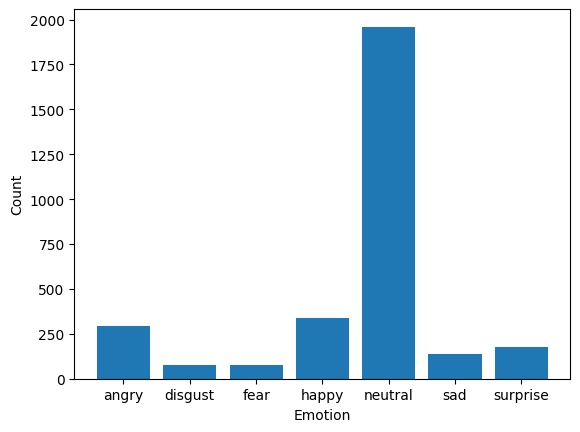

In [ ]:
import matplotlib.pyplot as plt
category_counts = x_data1.groupby('Emotion_x').size()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# 불용어 처리하기

In [ ]:
from konlpy.tag import Okt
#konlpy의 Okt 사용용
from typing import List

def remove_stopwords(texts: List[str], stopwords: List[str]) -> List[str]:
    okt = Okt()
    
    result = []
    for text in texts:
        morphs = okt.morphs(text)
        words = [morph for morph in morphs if morph not in stopwords]
        result.append(" ".join(words))
        
    return result

In [ ]:
stopwords = ['있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니',
             '우리', '때', '년', '가', '한', '지', '대하', '오',  '일', '그렇', '위하','을', '를', '의', '이',
             '가', '은', '는', '를', '들', '에게', '에', '에요','에서','이', '그', '저', '데', '에', '는', 
             '은', '를', '나', '너', '우리', '그들', '제', '이들', '저희', '이제', '그래서', '그러나',
             '그러므로', '그리고','이다','입니다','하다','한다','합니다','된다']

text_list=remove_stopwords(x_data1['text'], stopwords)
text_list_train=remove_stopwords(train_set1['text'], stopwords)

In [ ]:
x_data1['new_text']=text_list
train_set1['new_text']=text_list_train



> nan 값 확인하기 : 짧은 문장일 경우 불용어 처리 후 nan값이 생길 수 있음




In [ ]:
nan_rows = x_data1[x_data1['new_text'].isnull()]
nan_rows_train = train_set1[train_set1['new_text'].isnull()]


In [ ]:
print(nan_rows)
print(nan_rows_train)

Empty DataFrame
Columns: [text, Emotion_x, new_text]
Index: []
Empty DataFrame
Columns: [text, Emotion_x, new_text]
Index: []



# max_length 정의하기
텍스트 데이터에서 텍스트 길이 분포 히스토그램으로 나타내기
길이가 100까지 있지만 10개 이하의 legnth는 소규모인 것을 감안하여 max_length를 50으로 지정

(70으로 지정했을 때 학습이 잘 안됨)

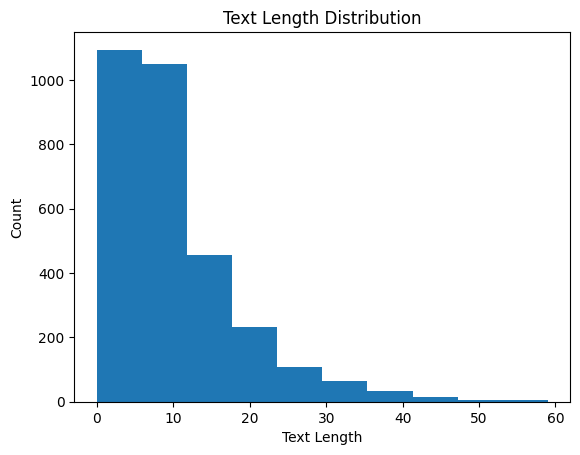

In [ ]:
text_lengths = [len(text.split()) for text in x_data1['new_text']]

# 각각 텍스트에 대한 길이를 측정정
plt.hist(text_lengths, bins=10)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()

# train, test subset 지정하기 (K-fold)



> downstream task인 train dataset을 korpora 파이썬 패키지 툴킷을 사용하여 새로운 데이터셋으로 커스터마이징을 진행






In [ ]:
train_set1=train_set1[['new_text','Emotion_x']]
x_data1=x_data1[['new_text','Emotion_x']]

In [ ]:
train_set1.to_csv("../dataset/Korpora_ke/train.csv",encoding='utf-8')
x_data1.to_csv("../dataset/Korpora_ke/test.csv",encoding='utf-8')

In [ ]:
train_set1

,new_text,Emotion_x
0,몰라 아 몰라 어떡해,fear
1,섭씨 일단 신고 하자,fear
2,아 지금 생각 할게 할게 뭐 있어 섭씨 여기있어 일단 내 가서 보고 올테니까,fear
3,아 그게 말 야 아무 도 도로 아무 도 없어,fear
4,아 그래 근데 지금 없어 죽었는지 살았는지 친 없단 말 야,fear
...,...,...
12233,뭔가 막 그게 그니까 완전 대중화 된 시대 된 거야,neutral
12234,게임 속 스토리 상 에서는,neutral
12235,근데 그게 너무 저렴하고 하니까 다 갈아 치우고 막 내 아내 처럼 그니까 내 아내 ...,neutral
12236,왜냐면 내 아내 대신 할 있는 거야,neutral


batch_size = 256, learning_rate = 5e-5, max_seq_length = 50 으로 지정

In [ ]:
import torch

from ratsnlp.nlpbook.classification import ClassificationTrainArguments

args = ClassificationTrainArguments(
    pretrained_model_name="beomi/kcbert-base",
    downstream_corpus_name="Korpora_ke",
    downstream_corpus_root_dir="../dataset",
    downstream_model_dir="../dataset/Korpora_ke/checkpoint",
    batch_size=256,
    learning_rate=5e-5,
    max_seq_length=50,
    seed=42,
)  

ModuleNotFoundError: ignored

In [ ]:
from ratsnlp import nlpbook
nlpbook.set_seed(args)

set seed: 42


In [ ]:
nlpbook.set_logger(args)


INFO:ratsnlp:Training/evaluation parameters ClassificationTrainArguments(pretrained_model_name='beomi/kcbert-base', downstream_task_name='document-classification', downstream_corpus_name='Korpora_ke', downstream_corpus_root_dir='/content/drive/MyDrive/', downstream_model_dir='/content/drive/MyDrive/Korpora_ke/checkpoint', max_seq_length=50, save_top_k=1, monitor='min val_loss', seed=42, overwrite_cache=False, force_download=False, test_mode=False, learning_rate=5e-05, epochs=5, batch_size=256, cpu_workers=8, fp16=False, tpu_cores=0)
INFO:ratsnlp:Training/evaluation parameters ClassificationTrainArguments(pretrained_model_name='beomi/kcbert-base', downstream_task_name='document-classification', downstream_corpus_name='Korpora_ke', downstream_corpus_root_dir='/content/drive/MyDrive/', downstream_model_dir='/content/drive/MyDrive/Korpora_ke/checkpoint', max_seq_length=50, save_top_k=1, monitor='min val_loss', seed=42, overwrite_cache=False, force_download=False, test_mode=False, learning_



> args에 저장된 max_length에 따라서 토크나이징 진행




In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(
    args.pretrained_model_name,
    do_lower_case=False,
)

In [ ]:
import os, csv
from ratsnlp.nlpbook.classification import ClassificationDataset
from imblearn.over_sampling import SMOTE

from ratsnlp.nlpbook.classification.corpus import ClassificationExample
class NewsCorpus:
    
    def __init__(self):
      
        pass

    def get_examples(self, data_root_path, mode):
        data_fpath = os.path.join(data_root_path, f"{mode}.csv")
        f=open(data_fpath, "r", encoding="utf-8").readlines()  
        print(data_fpath)
        lines=list(csv.reader(f))
        # lines =pd.read_csv(data_fpath, index_col=0)
        examples = []
        for (i, line) in enumerate(lines):
            
            if i == 0:
                continue
            text_a, label = line[1:]
            examples.append(ClassificationExample(text_a=text_a, label=label))
        return examples

    def get_labels(self):
        return ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    @property
    def num_labels(self):
        return len(self.get_labels())



> NewsCorpus() 를 이용하여 학습, 테스트에 사용할 데이터셋을 불러온다
>
> ClassificationDataset()을 이용하여 학습, 테스트 데이터셋을 모델에 입력 가능한 형태로 변환한다



In [ ]:
corpus = NewsCorpus()

train_dataset = ClassificationDataset(
    args=args,
    corpus=corpus,
    tokenizer=tokenizer,
    mode="train",
)

INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...


/content/drive/MyDrive/Korpora_ke/train.csv


INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:tokenize sentences [took 1.894 s]
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:sentence: 몰라 아 몰라 어떡해
INFO:ratsnlp:tokens: [CLS] 몰라 아 몰라 어떡해 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
INFO:ratsnlp:tokens: [CLS

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler

train_dataloader = DataLoader(
    train_dataset,
    batch_size=args.batch_size,
    sampler=SequentialSampler(train_dataset),
    collate_fn=nlpbook.data_collator,
    drop_last=False,
    num_workers=args.cpu_workers,
)

In [ ]:
from torch.utils.data import SequentialSampler

val_dataset = ClassificationDataset(
    args=args,
    corpus=corpus,
    tokenizer=tokenizer,
    mode="test",
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=args.batch_size,
    sampler=SequentialSampler(val_dataset),
    collate_fn=nlpbook.data_collator,
    drop_last=False,
    num_workers=args.cpu_workers,
)

INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:Creating features from dataset file at /content/drive/MyDrive/Korpora_ke
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...
INFO:ratsnlp:tokenize sentences, it could take a lot of time...


/content/drive/MyDrive/Korpora_ke/test.csv


INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:tokenize sentences [took 0.526 s]
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:*** Example ***
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:sentence: 지금 그게 무슨 말 이야
INFO:ratsnlp:tokens: [CLS] 지금 그게 무슨 말 이야 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
INFO:ratsnlp:toke

In [ ]:
len(train_dataset)

12239

In [ ]:
len(val_dataset)

3059

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

class BertForSequenceClassificationModule(pl.LightningModule):
    def __init__(self, bert_model):
        super().__init__()
        self.bert_model = bert_model
        self.classifier = nn.Linear(bert_model.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        last_hidden_state = torch.mean(outputs.last_hidden_state, dim=1)
        logits = self.classifier(last_hidden_state)
        return logits

    def training_step(self, batch, batch_idx):
        ...
        return train_loss

    def validation_step(self, batch, batch_idx):
        ...
        return val_loss

    def test_step(self, batch, batch_idx):
        ...
        return test_loss


In [ ]:
from transformers import BertConfig, BertForSequenceClassification

pretrained_model_config = BertConfig.from_pretrained(
    args.pretrained_model_name,
    num_labels=corpus.num_labels,
     hidden_dropout_prob=0.5,
    attention_probs_dropout_prob=0.5,
    num_hidden_layers=6,

)


In [ ]:
model = BertForSequenceClassification.from_pretrained(
        args.pretrained_model_name,
        config=pretrained_model_config,
)

Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForSequenceClassification: ['bert.encoder.layer.11.attention.output.dense.weight', 'cls.seq_relationship.weight', 'bert.encoder.layer.6.attention.self.query.bias', 'bert.encoder.layer.11.attention.self.value.bias', 'bert.encoder.layer.11.attention.self.query.weight', 'bert.encoder.layer.9.intermediate.dense.weight', 'bert.encoder.layer.9.attention.output.dense.bias', 'bert.encoder.layer.11.intermediate.dense.bias', 'bert.encoder.layer.9.attention.self.query.weight', 'bert.encoder.layer.7.attention.output.dense.bias', 'bert.encoder.layer.7.output.LayerNorm.bias', 'bert.encoder.layer.7.output.dense.weight', 'bert.encoder.layer.6.output.LayerNorm.bias', 'bert.encoder.layer.7.attention.output.dense.weight', 'bert.encoder.layer.10.attention.self.key.bias', 'bert.encoder.layer.8.attention.output.LayerNorm.bias', 'bert.encoder.layer.7.attention.self.query.weight', 'bert.encoder.layer.7.intermediate.d

In [ ]:
from ratsnlp.nlpbook.classification import ClassificationTask
task = ClassificationTask(model, args)
#task 정의 (모델, 최적화방법, 학습 과정을 정의해놓은 것)

In [ ]:
trainer = nlpbook.get_trainer(args)
#트레이너 정의 -> GPU/TPU 설정, 로그 및 체크포인트 설정 다해줌

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


acc, loss metrix graph


In [ ]:
device = torch.device('cuda')


In [ ]:
torch.cuda.is_available()

True

In [ ]:

import pytorch_lightning as pl
import torch.optim as optim
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


import os
from pytorch_lightning.loggers import TensorBoardLogger
log_dir = "../Log/NLP/lightning_logs"
os.makedirs(log_dir, exist_ok=True)

early_stop_callback = EarlyStopping(
    monitor='val_acc',  # 모니터링할 지표
    min_delta=0.00,      # 이 값보다 작은 성능 개선은 무시
    patience=3,          # 성능 개선이 없는 에포크가 이 값만큼 지속되면 학습 종료
    verbose=True,        # 조기 종료 로그 출력 여부
    mode='max'           # 'min' 또는 'max' 중 하나로 설정, 지표가 최소화(min) 또는 최대화(max)되는 방향
)

logger = TensorBoardLogger(save_dir=log_dir, name="my_experiment")
# trainer = pl.Trainer(callbacks=[MyCallback()])
trainer = pl.Trainer(  gpus=1,log_every_n_steps=1, max_epochs=20,checkpoint_callback=False,callbacks=[early_stop_callback]) #checkpoint_callback 함수 false 체크포인트 모델 저장 X

trainer.fit(
    task,
    train_dataloaders=train_dataloader, 
    val_dataloaders=val_dataloader,
    
)

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:151: LightningDeprecationWarning: Setting `Trainer(checkpoint_callback=False)` is deprecated in v1.5 and will be removed in v1.7. Please consider using `Trainer(enable_checkpointing=False)`.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True, used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/core/optimizer.py:380: RuntimeWarning: Found unsupported keys in the optimizer configuration: {'scheduler'}
  rank_zero_warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                          | Params
-----

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved. New best score: 0.641


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.034 >= min_delta = 0.0. New best score: 0.675


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.018 >= min_delta = 0.0. New best score: 0.693


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.008 >= min_delta = 0.0. New best score: 0.702


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.008 >= min_delta = 0.0. New best score: 0.710


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.001 >= min_delta = 0.0. New best score: 0.711


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.005 >= min_delta = 0.0. New best score: 0.716


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_acc improved by 0.004 >= min_delta = 0.0. New best score: 0.720


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_acc did not improve in the last 3 records. Best score: 0.720. Signaling Trainer to stop.


In [ ]:
train_dataloader

In [ ]:
device = torch.device('cuda')


model.to(device)
all_probs = []
hidden_state=[]
for batch in train_dataloader:

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    token_type_ids = batch['token_type_ids'].to(device)


    with torch.no_grad():
        outputs  = model.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        for output in pooled_output:
          hidden_state.append(output.detach().cpu().numpy())
  
        outputs1  = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        logits = outputs1.logits
        probs = F.softmax(logits, dim=-1)
        all_probs.append(probs.cpu().numpy())


In [ ]:
device = torch.device('cuda')


model.to(device)
all_probs1 = []
hidden_state_test=[]
for batch in val_dataloader:
    
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    token_type_ids = batch['token_type_ids'].to(device)
    with torch.no_grad():
        outputs  = model.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooled_output = outputs.last_hidden_state[:, 0, :]
        for output in pooled_output:
          hidden_state_test.append(output.detach().cpu().numpy())

        outputs1  = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        logits = outputs1.logits
        probs = F.softmax(logits, dim=-1)
        all_probs1.append(probs.cpu().numpy())


In [ ]:
probs_array_train = np.vstack(all_probs)
probs_array_test = np.vstack(all_probs1)

logit

In [ ]:
all_probs_all =  probs_array_train.tolist()
all_probs_all1 =  probs_array_test.tolist()


In [ ]:
len(all_probs_all1)

3059

In [ ]:
import pandas as pd
logit=pd.DataFrame(train_set1['Emotion_x'],columns=['Emotion_x'])
logit['logit_value']=all_probs_all

In [ ]:
import pandas as pd
logit_test=pd.DataFrame(x_data1['Emotion_x'],columns=['Emotion_x'])
logit_test['logit_value']=all_probs_all1

In [ ]:
logit_test

,Emotion_x,logit_value
0,fear,"[0.05227743461728096, 0.008057339116930962, 0...."
1,fear,"[0.003728319425135851, 0.019112780690193176, 0..."
2,fear,"[0.015224143862724304, 0.006646307185292244, 0..."
3,fear,"[0.009697439149022102, 0.031790681183338165, 0..."
4,fear,"[0.004028407856822014, 0.00590219022706151, 0...."
...,...,...
3054,neutral,"[0.0019464535871520638, 0.001067560282535851, ..."
3055,neutral,"[0.0006032323581166565, 0.0014767542015761137,..."
3056,neutral,"[0.11584817618131638, 0.006975078955292702, 0...."
3057,neutral,"[0.0011430714512243867, 0.00039369380101561546..."


In [ ]:
import pickle

# 저장할 파일 경로
filename = "../dataset/Fusion(text)/kcbert_subset1_logit_train.pkl"

# hidden_state 리스트를 pickle 파일로 저장
with open(filename, 'wb') as f:
    pickle.dump(logit, f)

In [ ]:
import pickle

# 저장할 파일 경로
filename = "/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/kcbert_subset5_logit_test.pkl"

# hidden_state 리스트를 pickle 파일로 저장
with open(filename, 'wb') as f:
    pickle.dump(logit_test, f)

hidden_value

In [ ]:
len(hidden_state)

12239

In [ ]:
import pandas as pd
hidden_state_df=pd.DataFrame(train_set1['Emotion_x'],columns=['Emotion_x'])
hidden_state_df['hidden_value']=hidden_state

In [ ]:
import pandas as pd
hidden_state_test1=pd.DataFrame(x_data1['Emotion_x'],columns=['Emotion_x'])
hidden_state_test1['hidden_value']=hidden_state_test

In [ ]:
import pickle

# 저장할 파일 경로
filename = "/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/kcbert_subset1_hidden_train.pkl"

# hidden_state 리스트를 pickle 파일로 저장
with open(filename, 'wb') as f:
    pickle.dump(hidden_state_df, f)

In [ ]:
import pickle

# 저장할 파일 경로
filename1 = "/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/kcbert_subset1_hidden_test.pkl"

# hidden_state 리스트를 pickle 파일로 저장
with open(filename1, 'wb') as f:
    pickle.dump(hidden_state_test1, f)

In [ ]:
hidden_state_df

,Emotion_x,hidden_value
0,fear,"[1.4392045, 0.72124237, 0.89108855, 0.7394596,..."
1,fear,"[2.339872, 1.050645, -0.9064773, 0.19398828, 0..."
2,fear,"[1.0088991, 0.8702982, 0.65162575, 3.60585, 1...."
3,fear,"[0.93574244, 0.81450623, -1.6513399, 0.6763617..."
4,fear,"[0.35965312, -0.08878748, -1.1382558, 0.796690..."
...,...,...
12234,neutral,"[2.0403514, 0.78455704, -1.1723076, 0.6105209,..."
12235,neutral,"[1.5289346, 1.5161898, 0.65904945, 3.2383733, ..."
12236,neutral,"[-0.14427885, -0.45256272, -0.6004354, -0.9145..."
12237,neutral,"[1.6108776, 0.6851258, -1.9139504, -1.4206125,..."


In [ ]:
hidden_state_test1

,Emotion_x,hidden_value
0,fear,"[0.866265, 1.495288, 1.0166595, -0.96679807, 0..."
1,fear,"[-0.41170797, 0.64347357, -0.4401022, 0.217786..."
2,fear,"[0.6295401, 0.29317054, -0.24065296, 1.6922483..."
3,fear,"[1.2049996, 1.0665443, -0.1584586, -0.07337235..."
4,fear,"[-0.522191, 2.3516953, -0.2777225, -2.6772451,..."
...,...,...
3054,neutral,"[1.8833119, -0.022750378, -0.20924917, -0.2737..."
3055,neutral,"[0.7657896, 0.15908778, -0.78771096, -0.528823..."
3056,neutral,"[1.4110854, 1.1913861, -1.5401547, -0.94610864..."
3057,neutral,"[2.3997357, 0.44889182, -1.0392257, 0.4081197,..."


In [ ]:
device = torch.device('cuda')

model.to(device)
all_pro = []
for batch in val_dataloader:

    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    token_type_ids = batch['token_type_ids'].to(device)


    with torch.no_grad():
        outputs1  = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        logits = outputs1.logits
        probs = F.softmax(logits, dim=-1)
        all_pro.append(probs.cpu().numpy())


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert all_probs to a numpy array
probs_array = np.vstack(all_pro)

# Get predicted labels
pred_labels = np.argmax(probs_array, axis=1)

# Get true labels
true_labels = np.concatenate([batch['labels'] for batch in val_dataloader])

# Compute confusion matrix
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

cm = confusion_matrix(true_labels, pred_labels, labels=range(len(labels)))

# Print confusion matrix
print(cm)

[[ 188   13    7    7   72    2    8]
 [  28   16    2   11   20    0    1]
 [   3    0   39    6   12    2   12]
 [  11    1    4  191  118    1   11]
 [ 183   55   17  138 1474   34   59]
 [   4    0    1    5   31   95    0]
 [  14    0   16    9   53    0   86]]


In [ ]:
from sklearn.metrics import f1_score

# Get f1 score
f1_micro = f1_score(true_labels, pred_labels, labels=range(len(labels)), average='micro')
print(f1_micro)

0.6826797385620915


In [ ]:
from sklearn.metrics import f1_score

# Get f1 score
f1_macro = f1_score(true_labels, pred_labels, labels=range(len(labels)), average='macro')
print(f1_macro)

0.5313374587609905


In [ ]:
# weighted f1 score 계산
weighted_f1_score = f1_score(true_labels, pred_labels, average='weighted')
print('Weighted F1 score:', weighted_f1_score)

Weighted F1 score: 0.6910233388827294


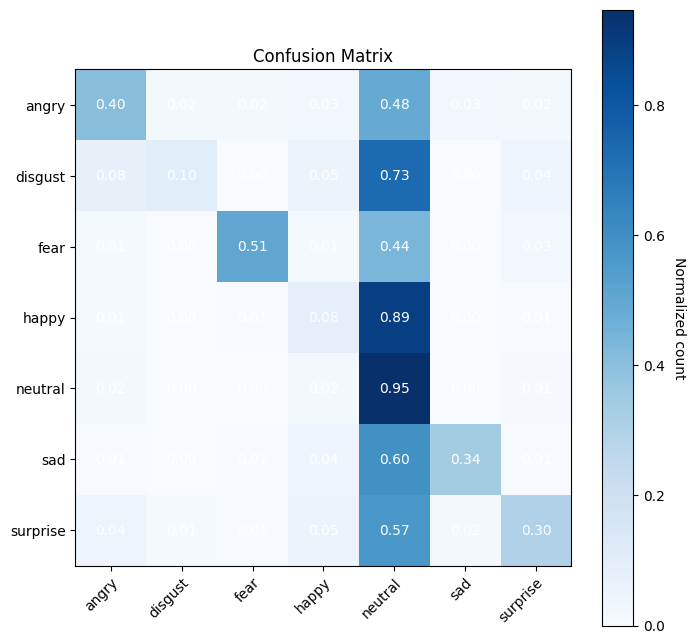

In [ ]:
import matplotlib.pyplot as plt

# Normalize confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_norm, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Normalized count', rotation=270, labelpad=15)

# Set ticks and labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Loop over data to create annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, '{:.2f}'.format(cm_norm[i, j]), ha='center', va='center', color='white')

# Set title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()
